#**PREDICTING FUEL EFFICIENCY USING MULTIPLE LINEAR REGRESSION**

# Importing Nescessary Libraries

In [43]:
#importing nescessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading the Dataset

In [44]:
#Loading the dataset
url = "cars.csv"
df = pd.read_csv(url)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


# Exploratory Data Analysis (EDA)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [46]:
#gives the descriptive statistics of the dataset
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


Dimension

In [28]:
print(df.shape[0])

5076


Numerical variables

In [29]:
numerical_variables = df.select_dtypes(include=['int64','float64']).columns
print(numerical_variables)
print("Number of Numerical variables : ",len(numerical_variables))

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')
Number of Numerical variables :  9


Categorical Variables

In [30]:
categorical_variables = df.select_dtypes(include=['object','bool']).columns
print(categorical_variables)
print("Number of Categorical Variables :", len(categorical_variables))

Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid', 'Engine Information.Transmission',
       'Fuel Information.Fuel Type', 'Identification.Classification',
       'Identification.ID', 'Identification.Make',
       'Identification.Model Year'],
      dtype='object')
Number of Categorical Variables : 9


# Data Cleaning

Checking for missing values

In [31]:
#identifying missing values
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found.")
else:
    print("Missing values found:\n",missing_values)


No missing values found.


Checking for duplicates

In [47]:
#Identifying duplicated rows
print("Number of duplicated rows: ",df.duplicated().sum())

Number of duplicated rows:  18


Fixing the duplicated rows

In [48]:
#Removes the fully duplicated rows
df.drop_duplicates(inplace=True)

print(df.shape)
df.head()

(5058, 18)


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243


# Handling Outliers

In [34]:
#Check for outliers in the numerical columnn
for column in numerical_variables:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] #Gives the remaining rows and columns after removing the outliers
print(df.shape)

(4794, 18)


# Handling Categorical Variables

In [12]:
print(df.dtypes)

categorical_variables = df.select_dtypes(include=['object','bool']).columns
print(categorical_variables)

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

In [35]:
print(df[categorical_variables].nunique())

Engine Information.Driveline          4
Engine Information.Engine Type      468
Engine Information.Hybrid             1
Engine Information.Transmission      10
Fuel Information.Fuel Type            4
Identification.Classification         2
Identification.ID                  4768
Identification.Make                  43
Identification.Model Year           828
dtype: int64


In [36]:
# One-hot encoding to encode categorical variables
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Engine Information.Driveline_Four-wheel drive,...,Identification.Model Year_2012 Volkswagen Passat,Identification.Model Year_2012 Volkswagen Routan,Identification.Model Year_2012 Volkswagen Tiguan,Identification.Model Year_2012 Volvo C30,Identification.Model Year_2012 Volvo C70,Identification.Model Year_2012 Volvo S60,Identification.Model Year_2012 Volvo S80,Identification.Model Year_2012 Volvo XC60,Identification.Model Year_2012 Volvo XC70,Identification.Model Year_2012 Volvo XC90
0,140,143,202,6,18,25,2009,250,236,False,...,False,False,False,False,False,False,False,False,False,False
1,140,143,202,6,22,28,2009,200,207,False,...,False,False,False,False,False,False,False,False,False,False
2,140,143,202,6,21,30,2009,200,207,False,...,False,False,False,False,False,False,False,False,False,False
3,140,143,202,6,21,28,2009,200,207,False,...,False,False,False,False,False,False,False,False,False,False
5,91,17,62,6,16,27,2009,265,243,False,...,False,False,False,False,False,False,False,False,False,False


#Correlation Matrix (Heatmap)

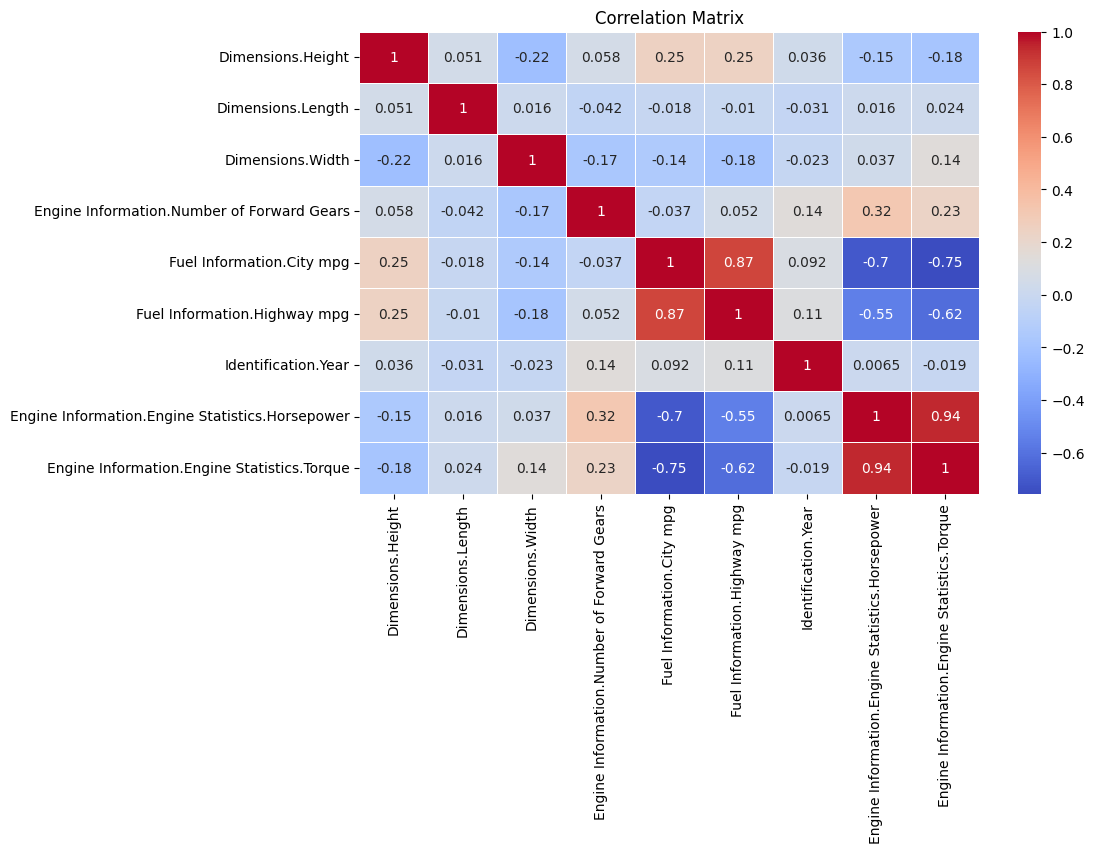

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))

plt.title("Correlation Matrix")
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# Model Training & Model Evaluation



 Model Performance: Before Outlier Removal
--------------------------------------------------
 R² Score  : 0.8830
 RMSE      : 1.5663
 MSE       : 2.4533

 Model Performance: After Outlier Removal
--------------------------------------------------
 R² Score  : 0.9257
 RMSE      : 1.1872
 MSE       : 1.4094


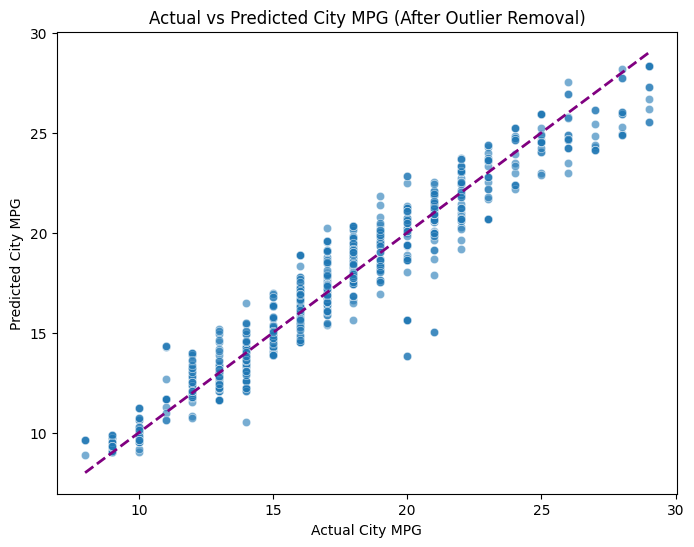

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df.rename(columns={
    "Fuel Information.City mpg": "City_mpg",
    "Fuel Information.Highway mpg": "Highway_mpg",
    "Engine Information.Engine Statistics.Torque": "Torque"
}, inplace=True)



numerical_variables = ["City_mpg", "Highway_mpg", "Torque"]

# Function for evaaluating the  model

def evaluate_model(df, description):
    X = df[["Highway_mpg", "Torque"]]
    y = df["City_mpg"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n Model Performance: {description}")
    print("-" * 50)
    print(f" R² Score  : {r2:.4f}")
    print(f" RMSE      : {rmse:.4f}")
    print(f" MSE       : {mse:.4f}")


    return model , y_test, y_pred


# Evaluate model before outlier removal
model_before, y_test_before, y_pred_before = evaluate_model(df, "Before Outlier Removal")

df_clean = df.copy()
for column in numerical_variables:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]  # removing outliers


# Evaluate model after outlier removal
model_after, y_test_after, y_pred_after = evaluate_model(df_clean, "After Outlier Removal")

# Visualizing Model Performance After Outlier Removal
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_after, y=y_pred_after, alpha=0.6)
plt.plot([min(y_test_after), max(y_test_after)], [min(y_test_after), max(y_test_after)],
         color="purple", linestyle="--", linewidth=2)
plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs Predicted City MPG (After Outlier Removal)")
plt.show()


#Variance Inflation Factor(VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define independent variables
X = df_clean[["Highway_mpg", "Torque"]]
X = add_constant(X)

# Create an empty DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


      Variable        VIF
0        const  93.308800
1  Highway_mpg   2.092416
2       Torque   2.092416


# Residuals


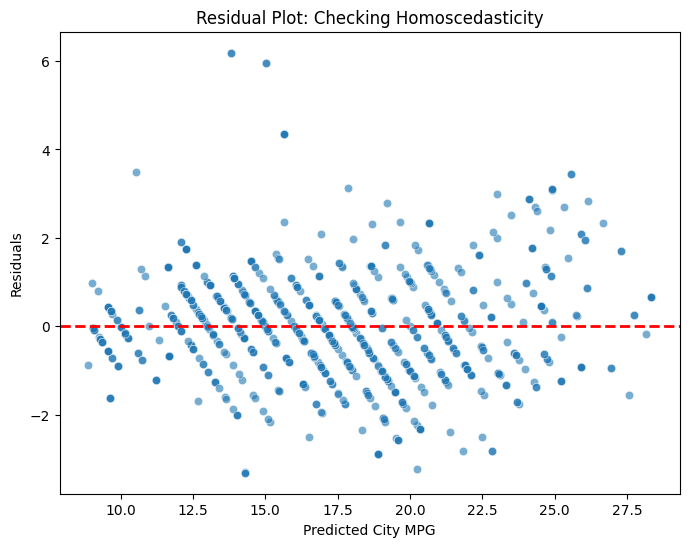

In [20]:
# Calculate residuals
residuals = y_test_after - y_pred_after

# Plot residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_after, y=residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)  # Horizontal line at residual=0
plt.xlabel("Predicted City MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot: Checking Homoscedasticity")
plt.show()